<a href="https://colab.research.google.com/github/SamiraHabib/Fake_News/blob/main/projeto_fake_news_2_FINALipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Visualização dos dados**



In [ ]:
import pandas as pd

In [ ]:
data_df = pd.read_json('https://raw.githubusercontent.com/SamiraHabib/Fake_News/main/fakeNews%20_temp3.json')

In [ ]:
data_df.head(2)

,claim_datetime,claim_first,review_resume,review_datetime,review_title,review_conclusion,news_keyword,news_countries,claims_total,news_type,news_url,news_url_archive,news_part,review_start_time,review_end_time,news_org_location,news_org,news_logo_type,news_logo_url,news_language,news_language_code
0,2019-12-13T00:00:00+00:00,/news_articles/598,Ukraine has put itself in a situation when ext...,2019-12-16T00:00:00+00:00,Normandy summit results: the EU plays on Russi...,This article misrepresents the actual German a...,"[Abandoned Ukraine, Angela Merkel, Emmanuel Ma...","[Russia, Ukraine, The West, EU, Germany, France]","[/claims/75, /claims/79, /claims/80, /claims/8...",http://schema.org/NewsArticle,https://sputnik.by/columnists/20191213/1043442...,https://web.archive.org/web/20191213153206/htt...,"На нынешней же встрече Зеленский (который, кст...",NaN,NaN,Belarus,sputnik.by // lifenews.ru,http://schema.org/ImageObject,https://api.veedoo.io/images/5e3150bc27830_2fd...,Russian,rus
1,2019-09-26T00:00:00+00:00,/news_articles/1835,Regardless who was behind the recent attack on...,2019-09-27T00:00:00+00:00,The US benefits from the attack on the Saudi o...,No evidence is provided to support the claim. ...,"[Conspiracy, Terrorism, Donald Trump]","[Iran, United States, Saudi Arabia]","[/claims/934, /claims/941, /claims/942, /claim...",http://schema.org/NewsArticle,https://southfront.org/who-really-benefits-fro...,https://web.archive.org/web/20190927121413/htt...,None,NaN,NaN,None,southfront.org,None,None,English,eng


##**Palavras mais citadas**

In [ ]:
!pip install wordcloud
!pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp37-none-any.whl size=32913 sha256=489e42a83bf15d86970708c96f8de56e5500153bd8f55c45f4148bd28ebe726f
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [ ]:
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt
from itertools import chain
from collections import Counter
import nltk 
from nltk.corpus import stopwords 
import json
import re
from string import punctuation
from unicodedata import normalize

In [ ]:
%pylab inline
import nltk
import gensim

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!pip install stop-words

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

**Função que plota a word cloud**

In [ ]:
def print_words(list_col):
  
  text_string = " ".join(list_col).lower()
  stop_words = STOPWORDS
  word_cloud = WordCloud(stopwords = stop_words, 
                      background_color = "white",
                      collocations=False,
                      width = 1000, height = 500).generate(text_string)

  plt.figure(figsize=(15,8))
  plt.imshow(word_cloud)
  plt.axis("off")
  return plt.show()

In [ ]:
from stop_words import get_stop_words
from nltk.corpus import stopwords

stop_words = list(get_stop_words("en"))         #About 900 stopwords
nltk_words = list(stopwords.words("english")) #About 150 stopwords
stop_words.extend(nltk_words)

#data_df['news_keyword'] = [w for w in data_df['news_keyword'] if not w in stop_words]

**Função que plota gráfico de barras**

In [ ]:
def plot_grafic(df_col):

  #contar as aparições repetidas
  countries_dict = Counter(df_col)
  sorted(countries_dict, key=countries_dict.get)
  countries_dict
  df = pd.DataFrame.from_dict(countries_dict, orient='index')
  df.rename(columns={0: 'Count'}, inplace = True)
  df.index.name = 'Countries'
  df_count_names = df.nlargest(10, 'Count')

  #separar os valores dos eixos do gráfico
  val_num = df_count_names['Count']
  val_name = df_count_names.index

  #construir e plotar o gráfico
  plt.figure(figsize = (12,7))
  plt.barh(val_name, val_num, align='center',color='salmon', edgecolor = 'salmon')
  plt.legend(labels = ['Quantidade mais recorrente'])
  plt.title("FAKE NEWS")
  plt.xlabel('Numbers')
  plt.ylabel('Names')

  return plt.show()

**Função que remove stopwords**

In [ ]:
def remove_stopwords(df, col):
  import re
  import sys
  from nltk.corpus import stopwords 
  from nltk.tokenize import word_tokenize

  df_stopwords = pd.DataFrame()
  
  words_compr = []
  for idx, item in enumerate(df[col]):
    words_compr.append(item)
  words2 = "".join(map(str, words_compr))

  userstring = words2.split(" ")
  stop_words = set(stopwords.words('english')) 
  another_list_word = []
  for x in userstring:
    x = x.lower()
    if x not in stop_words:           
      another_list_word.append(x)
  
  df_stopwords['stop_words'] = another_list_word

  return df_stopwords['stop_words']

###**Palavras chaves mais citadas nas notícias originais**

In [ ]:
keyword_list = list(chain(*data_df['news_keyword']))

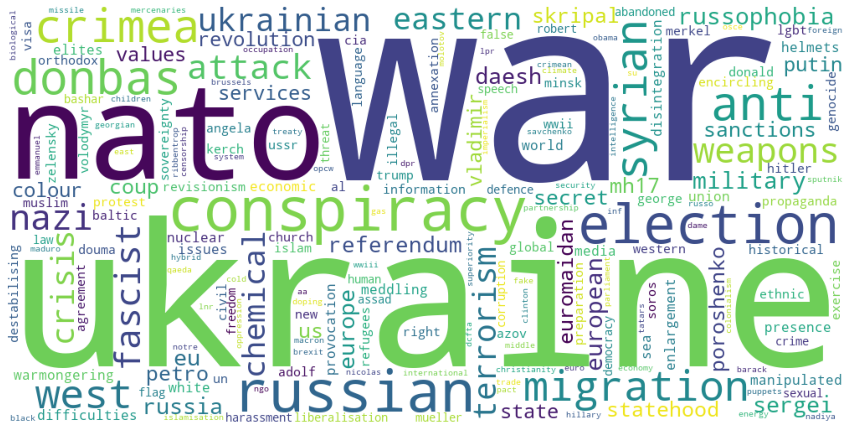

In [ ]:
print_words(keyword_list)

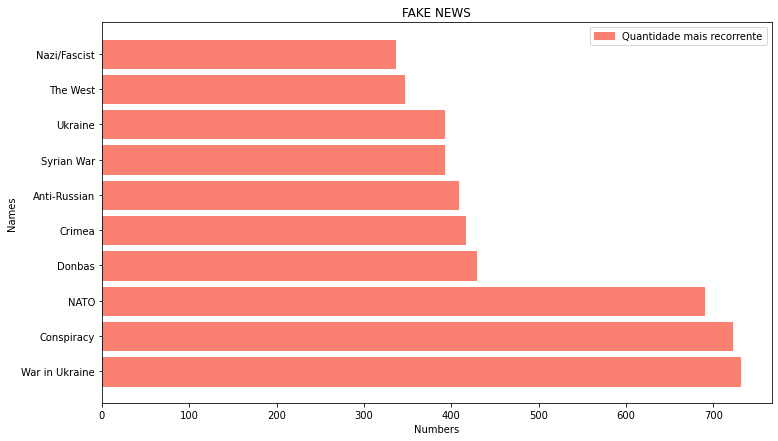

In [ ]:
plot_grafic(keyword_list)

### **Países mais citados nas notícias originais**

In [ ]:
countries_list = list(chain(*data_df['news_countries']))

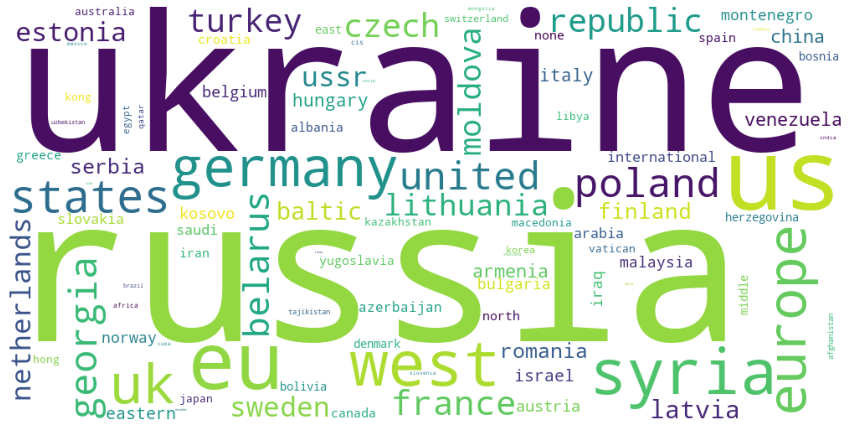

In [ ]:
print_words(countries_list)

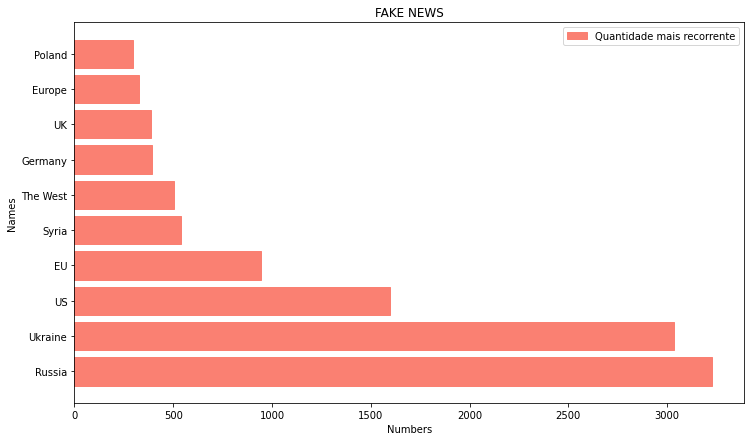

In [ ]:
plot_grafic(countries_list)

###**Palavras mais citadas nos TÍTULOS das avaliações de FakeNews do EU vs Desinfo**

In [ ]:
title_list = list(chain(data_df['review_title']))

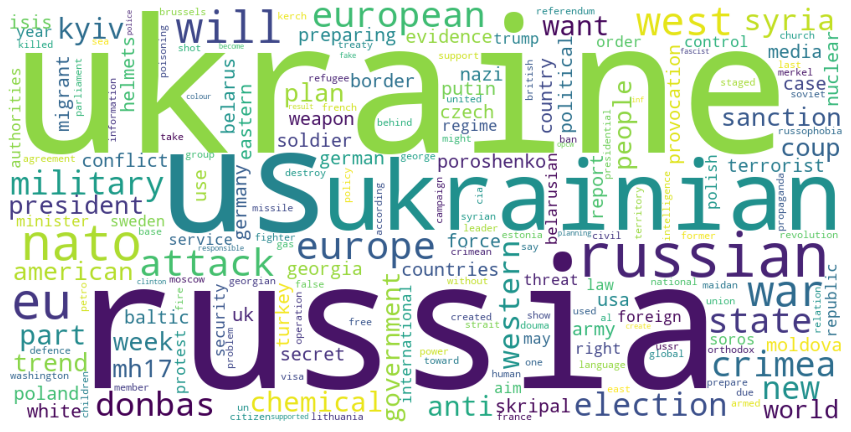

In [ ]:
print_words(title_list)

In [ ]:
claim_title = (remove_stopwords(data_df, 'review_title'))

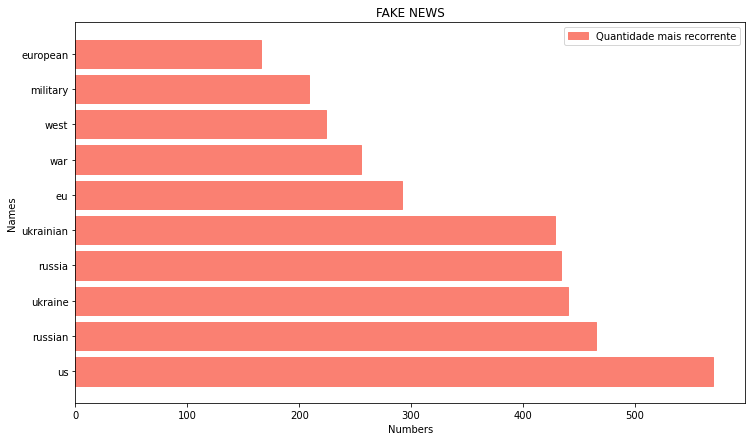

In [ ]:
plot_grafic(claim_title)

###**Palavras mais citadas nos RESUMOS das avaliações de FakeNews do EU vs Desinfo**

In [ ]:
resume_list = list(chain(data_df['review_resume']))

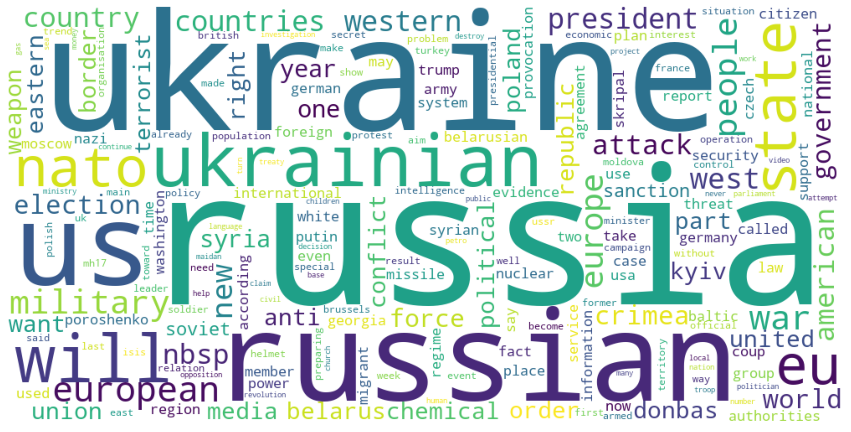

In [ ]:
print_words(resume_list)

In [ ]:
k = remove_stopwords(data_df,'review_resume')

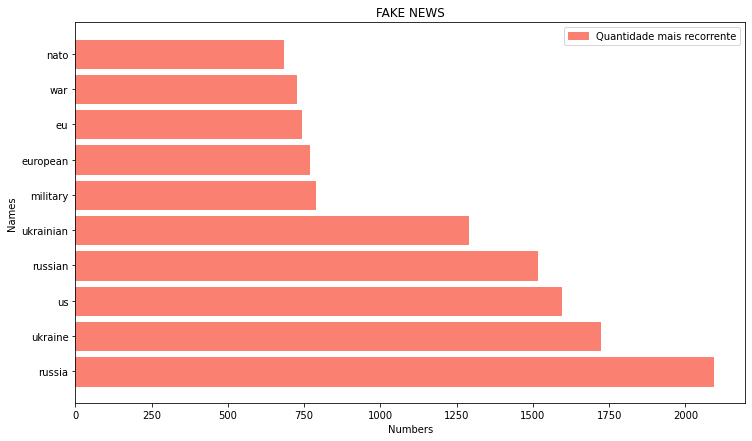

In [ ]:
plot_grafic(k)

###**Palavras mais citadas nas CONCLUSÕES das avaliações de FakeNews do EU vs Desinfo**

In [ ]:
conclusion_list = list(chain(data_df['review_conclusion']))

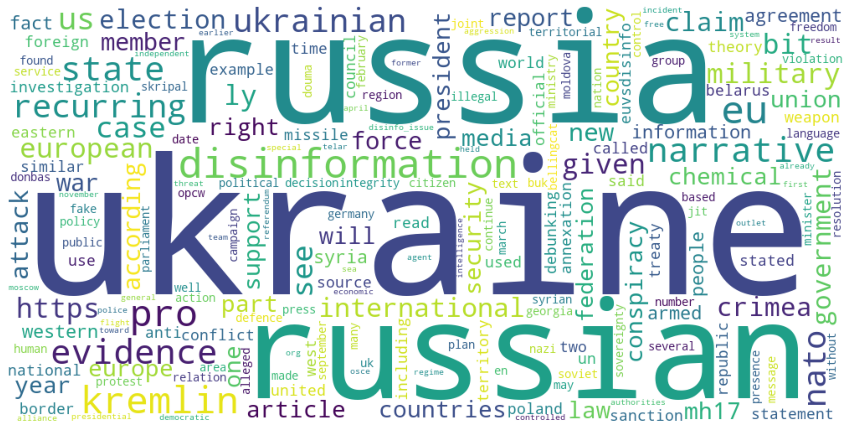

In [ ]:
print_words(conclusion_list)

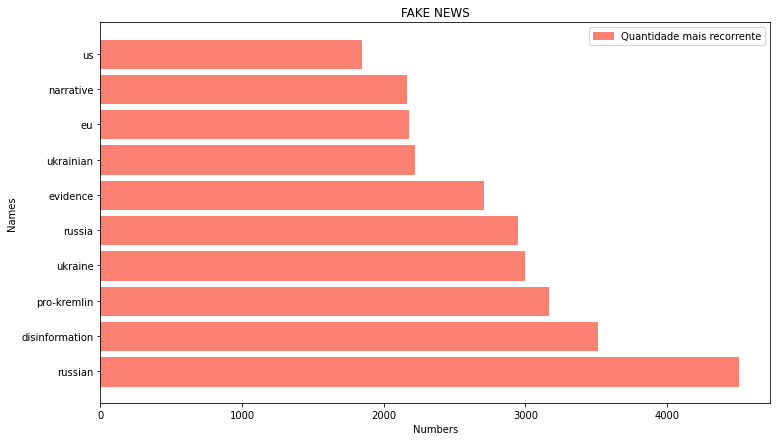

In [ ]:
clean_data = remove_stopwords(data_df, 'review_conclusion')
plot_grafic(clean_data)